# Projeto de Redes Neurais Artificiais - Previsão de inadiplencia de Cartão de Credito 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Configuração para visualizações
plt.style.use('default')
sns.set_palette("husl")

### Carregamento e Exploração dos Dados

In [2]:
# Carregamento dos dados
# Nota: O arquivo usa ';' como separador
df = pd.read_csv('default of credit card clients.csv', sep=';', header=1)

In [31]:
print("\nDESCRIÇÃO DO CONJUNTO DE DADOS")
print("-" * 40)

print(f"Dimensões do dataset: {df.shape}")
print(f"Número de objetos (amostras): {df.shape[0]}")
print(f"Número de características: {df.shape[1] - 1}")  # -1 porque uma coluna é o target


DESCRIÇÃO DO CONJUNTO DE DADOS
----------------------------------------
Dimensões do dataset: (30000, 25)
Número de objetos (amostras): 30000
Número de características: 24


In [32]:
# Informações básicas sobre o dataset
print(f"\nPrimeiras 5 linhas do dataset:")
df.head()


Primeiras 5 linhas do dataset:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
print(f"\nInformações gerais do dataset:")
df.info()


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   3

In [34]:
print(f"\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [35]:
# Identificação da tarefa de predição
target_column = 'default payment next month'
features = [col for col in df.columns if col != target_column]

In [39]:
print(f"\nTAREFA DE PREDIÇÃO:")
print(f"  Classificação binária - Predizer se um cliente irá dar default no pagamento do cartão de crédito")
print(f"  Variável alvo: '{target_column}'")

print(f"\nCARACTERÍSTICAS DO CONJUNTO:")
print(f"  ID: Identificador único do cliente")
print(f"  LIMIT_BAL: Limite de crédito (NT dollar)")
print(f"  SEX: Gênero (1=masculino, 2=feminino)")
print(f"  EDUCATION: Educação (1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros)")
print(f"  MARRIAGE: Estado civil (1=casado, 2=solteiro, 3=outros)")
print(f"  AGE: Idade em anos")
print(f"  PAY_0 a PAY_6: Status de pagamento (-1=pago em dia, 1=atraso 1 mês, 2=atraso 2 meses, etc.)")
print(f"  BILL_AMT1 a BILL_AMT6: Valor da fatura (NT dollar)")
print(f"  PAY_AMT1 a PAY_AMT6: Valor do pagamento anterior (NT dollar)")


TAREFA DE PREDIÇÃO:
  Classificação binária - Predizer se um cliente irá dar default no pagamento do cartão de crédito
  Variável alvo: 'default payment next month'

CARACTERÍSTICAS DO CONJUNTO:
  ID: Identificador único do cliente
  LIMIT_BAL: Limite de crédito (NT dollar)
  SEX: Gênero (1=masculino, 2=feminino)
  EDUCATION: Educação (1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros)
  MARRIAGE: Estado civil (1=casado, 2=solteiro, 3=outros)
  AGE: Idade em anos
  PAY_0 a PAY_6: Status de pagamento (-1=pago em dia, 1=atraso 1 mês, 2=atraso 2 meses, etc.)
  BILL_AMT1 a BILL_AMT6: Valor da fatura (NT dollar)
  PAY_AMT1 a PAY_AMT6: Valor do pagamento anterior (NT dollar)


In [41]:
# Análise das características categóricas vs numéricas
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE'] + [f'PAY_{i}' for i in range(0, 7)]
numerical_features = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

print(f"\nTIPOS DE CARACTERÍSTICAS:")
print(f"  Categóricas ({len(categorical_features)}): {categorical_features}")
print(f"  Numéricas ({len(numerical_features)}): {numerical_features}")


TIPOS DE CARACTERÍSTICAS:
  Categóricas (10): ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
  Numéricas (14): ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [42]:
# Análise da variável alvo (proporção das classes)
target_counts = df[target_column].value_counts()
target_proportions = df[target_column].value_counts(normalize=True)

print(f"\nDISTRIBUIÇÃO DA VARIÁVEL ALVO:")
print(f"  Classe 0 (Não default): {target_counts[0]} ({target_proportions[0]:.2%})")
print(f"  Classe 1 (Default): {target_counts[1]} ({target_proportions[1]:.2%})")


DISTRIBUIÇÃO DA VARIÁVEL ALVO:
  Classe 0 (Não default): 23364 (77.88%)
  Classe 1 (Default): 6636 (22.12%)


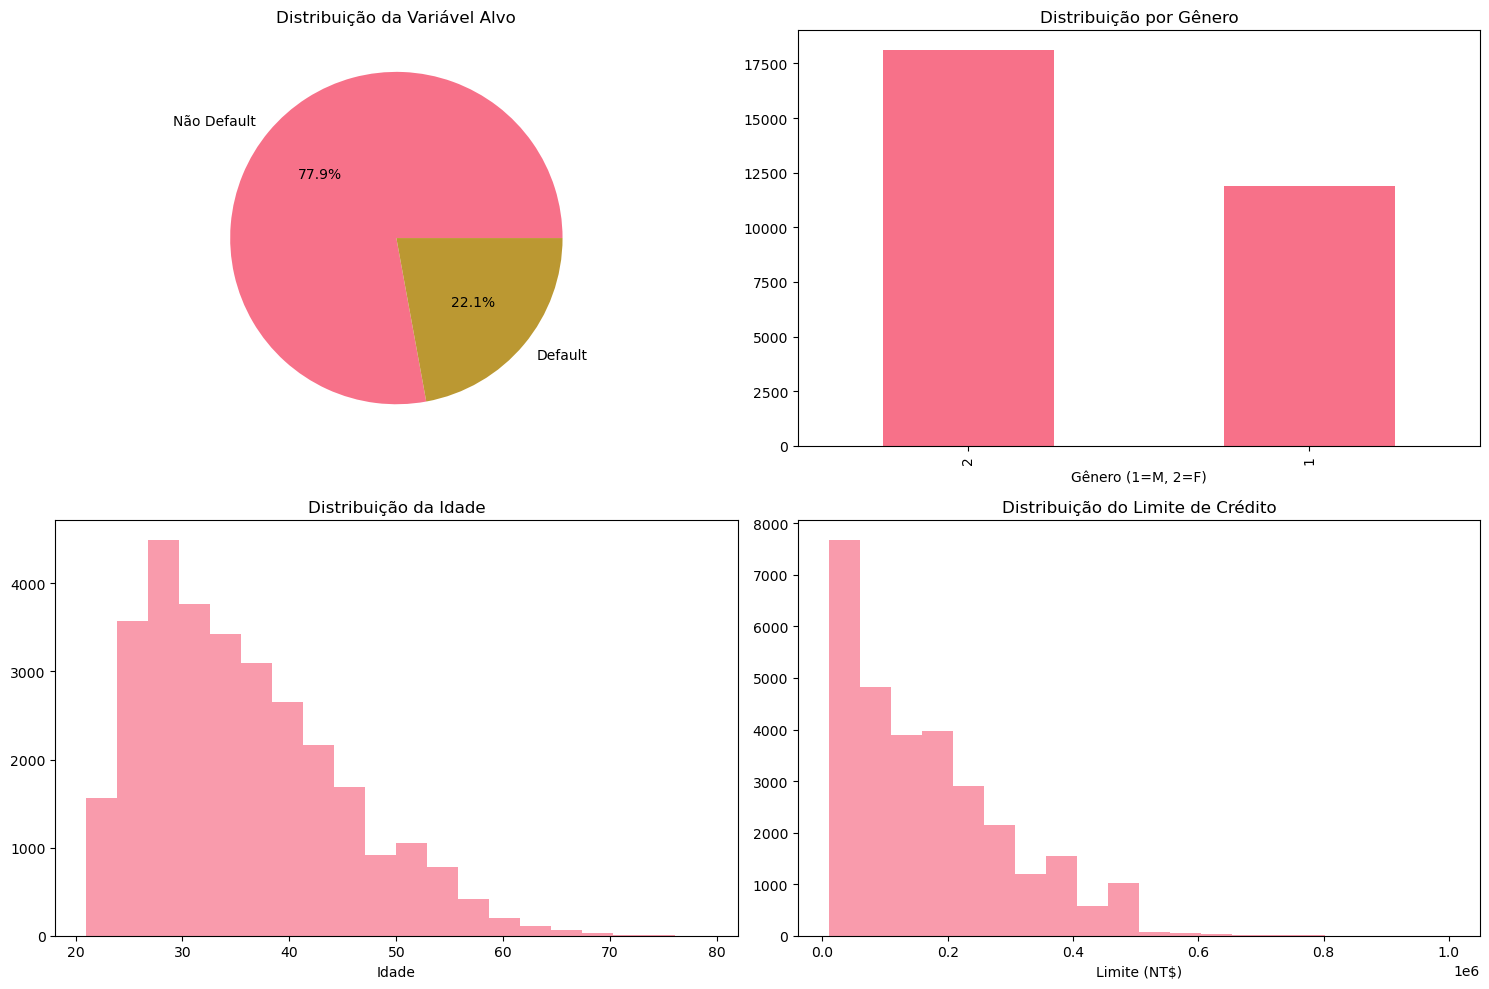

In [43]:
# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribuição da variável alvo
axes[0,0].pie(target_counts.values, labels=['Não Default', 'Default'], autopct='%1.1f%%')
axes[0,0].set_title('Distribuição da Variável Alvo')

# Distribuição de algumas variáveis categóricas
df['SEX'].value_counts().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Distribuição por Gênero')
axes[0,1].set_xlabel('Gênero (1=M, 2=F)')

# Distribuição da idade
axes[1,0].hist(df['AGE'], bins=20, alpha=0.7)
axes[1,0].set_title('Distribuição da Idade')
axes[1,0].set_xlabel('Idade')

# Distribuição do limite de crédito
axes[1,1].hist(df['LIMIT_BAL'], bins=20, alpha=0.7)
axes[1,1].set_title('Distribuição do Limite de Crédito')
axes[1,1].set_xlabel('Limite (NT$)')

plt.tight_layout()
plt.show()

### PRÉ-PROCESSAMENTO


- One-Hot Encoding para variáveis categóricas (SEX, EDUCATION, MARRIAGE)
- Padronização com StandardScaler para todas as features
- Verificação de valores ausentes
- Transformação dos dados para formato adequado ao MLP

In [51]:
# Remover a coluna ID pois não é relevante para predição
df_processed = df.drop('ID', axis=1, errors='ignore')

In [52]:
# Verificar valores ausentes
missing_values = df_processed.isnull().sum()
print(f"Valores ausentes por coluna:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Nenhum valor ausente encontrado")

Valores ausentes por coluna:
Nenhum valor ausente encontrado


In [53]:
# Separar features e target
X = df_processed.drop(target_column, axis=1)
y = df_processed[target_column]

print(f"\nShape das features: {X.shape}")
print(f"Shape do target: {y.shape}")


Shape das features: (30000, 23)
Shape do target: (30000,)


In [54]:
# Para as variáveis PAY_0 a PAY_6, verificar os valores
pay_cols = [col for col in X.columns if col.startswith('PAY_')]
print(f"\nVariáveis de status de pagamento:")
for col in pay_cols:
    unique_vals = sorted(X[col].unique())
    print(f"  {col}: {unique_vals}")


Variáveis de status de pagamento:
  PAY_0: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
  PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
  PAY_AMT1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 39, 40, 41, 44, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 104, 105, 107, 108, 109, 110, 113, 116, 120, 121, 123, 125, 127, 129, 130, 131, 132, 133, 135, 136, 137, 138, 140, 141, 142, 144, 145, 146, 148, 149, 150, 151, 152, 154, 155, 156, 157, 159, 162, 165, 166, 167, 168, 169, 170, 171, 172, 174, 176, 177, 179, 181, 182, 183, 184, 185, 187, 188, 189, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 

In [55]:
# Tratamento das variáveis categóricas
# As variáveis já estão codificadas numericamente, mas vamos aplicar One-Hot Encoding
# para algumas delas para melhor performance do modelo

print(f"\nAplicando transformações...")

# Para SEX, EDUCATION, MARRIAGE - usar One-Hot Encoding
categorical_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE']
X_encoded = pd.get_dummies(X, columns=categorical_to_encode, prefix=categorical_to_encode)

print(f"Shape após One-Hot Encoding: {X_encoded.shape}")


Aplicando transformações...
Shape após One-Hot Encoding: (30000, 33)


In [56]:
# Padronização das variáveis numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print(f"Padronização aplicada usando StandardScaler")
print(f"Shape final das features: {X_scaled.shape}")

Padronização aplicada usando StandardScaler
Shape final das features: (30000, 33)


### DIVISÃO DOS DADOS E CONSTRUÇÃO DO MODELO MLP

- Teste de 4 configurações diferentes de MLPClassifier:

 - MLP Default (padrão do scikit-learn)
 - MLP Small (1 camada: 50 neurônios)
 - MLP Medium (2 camadas: 100, 50 neurônios)
 - MLP Large (3 camadas: 200, 100, 50 neurônios)

In [58]:
# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")
print(f"Proporção de classes no treino: {np.bincount(y_train) / len(y_train)}")
print(f"Proporção de classes no teste: {np.bincount(y_test) / len(y_test)}")

Tamanho do conjunto de treinamento: 24000
Tamanho do conjunto de teste: 6000
Proporção de classes no treino: [0.77879167 0.22120833]
Proporção de classes no teste: [0.77883333 0.22116667]


### TREINAMENTO DE MODELOS MLP COM DIFERENTES CONFIGURAÇÕES

- Múltiplas métricas: Acurácia, Precisão, Recall, F1-Score, AUC-ROC
- Visualizações:

 - Curvas ROC comparativas
 - Matriz de confusão
 - Distribuição das probabilidades preditas
 - Gráficos comparativos entre modelos

In [ ]:
# Definir diferentes configurações de MLP para teste
mlp_configs = {
    'MLP_Default': MLPClassifier(random_state=42, max_iter=1000),
    'MLP_Small': MLPClassifier(hidden_layer_sizes=(50,), random_state=42, max_iter=1000),
    'MLP_Medium': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000),
    'MLP_Large': MLPClassifier(hidden_layer_sizes=(200, 100, 50), random_state=42, max_iter=1000),
}

results_cv = {}

for name, model in mlp_configs.items():
    print(f"\nAvaliando {name} com validação cruzada (5 folds)...")
    scores = cross_validate(
        model, X_scaled, y,
        cv=5,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        return_train_score=False
    )
    results_cv[name] = {metric: scores[f'test_{metric}'].mean() for metric in scores if metric.startswith('test_')}
    for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
        print(f"  {metric}: {scores[f'test_{metric}'].mean():.4f} (+/- {scores[f'test_{metric}'].std():.4f})")

# Criar DataFrame com resultados da validação cruzada
results_cv_df = pd.DataFrame({
    'Modelo': list(results_cv.keys()),
    'Acurácia': [results_cv[k]['test_accuracy'] for k in results_cv.keys()],
    'Precisão': [results_cv[k]['test_precision'] for k in results_cv.keys()],
    'Recall': [results_cv[k]['test_recall'] for k in results_cv.keys()],
    'F1-Score': [results_cv[k]['test_f1'] for k in results_cv.keys()],
    'AUC-ROC': [results_cv[k]['test_roc_auc'] for k in results_cv.keys()]
})

print("\nResumo das métricas (validação cruzada):")
print(results_cv_df.round(4))

    print(f"  Acurácia: {accuracy:.4f}")
    print(f"  Precisão: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {auc:.4f}")


Treinando MLP_Default...
  Acurácia: 0.8062
  Precisão: 0.6057
  Recall: 0.3542
  F1-Score: 0.4470
  AUC-ROC: 0.7598

Treinando MLP_Small...
  Acurácia: 0.8157
  Precisão: 0.6330
  Recall: 0.3964
  F1-Score: 0.4875
  AUC-ROC: 0.7658

Treinando MLP_Medium...


## **5. COMPARAÇÃO DETALHADA DOS MODELOS**

- Relatório de classificação detalhado
- Informações sobre o treinamento dos modelos
- Conclusões e sugestões para a Parte II

In [21]:
print(f"\n5. COMPARAÇÃO DETALHADA DOS MODELOS")
print("-" * 40)

# Criar DataFrame com resultados
results_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Acurácia': [results[k]['accuracy'] for k in results.keys()],
    'Precisão': [results[k]['precision'] for k in results.keys()],
    'Recall': [results[k]['recall'] for k in results.keys()],
    'F1-Score': [results[k]['f1'] for k in results.keys()],
    'AUC-ROC': [results[k]['auc'] for k in results.keys()]
})

print("Resumo das métricas:")
print(results_df.round(4))


5. COMPARAÇÃO DETALHADA DOS MODELOS
----------------------------------------
Resumo das métricas:
        Modelo  Acurácia  Precisão  Recall  F1-Score  AUC-ROC
0  MLP_Default    0.8062    0.6057  0.3542    0.4470   0.7598
1    MLP_Small    0.8140    0.6467  0.3504    0.4545   0.7638
2   MLP_Medium    0.7712    0.4766  0.3527    0.4054   0.6905
3    MLP_Large    0.7642    0.4618  0.4009    0.4292   0.7077


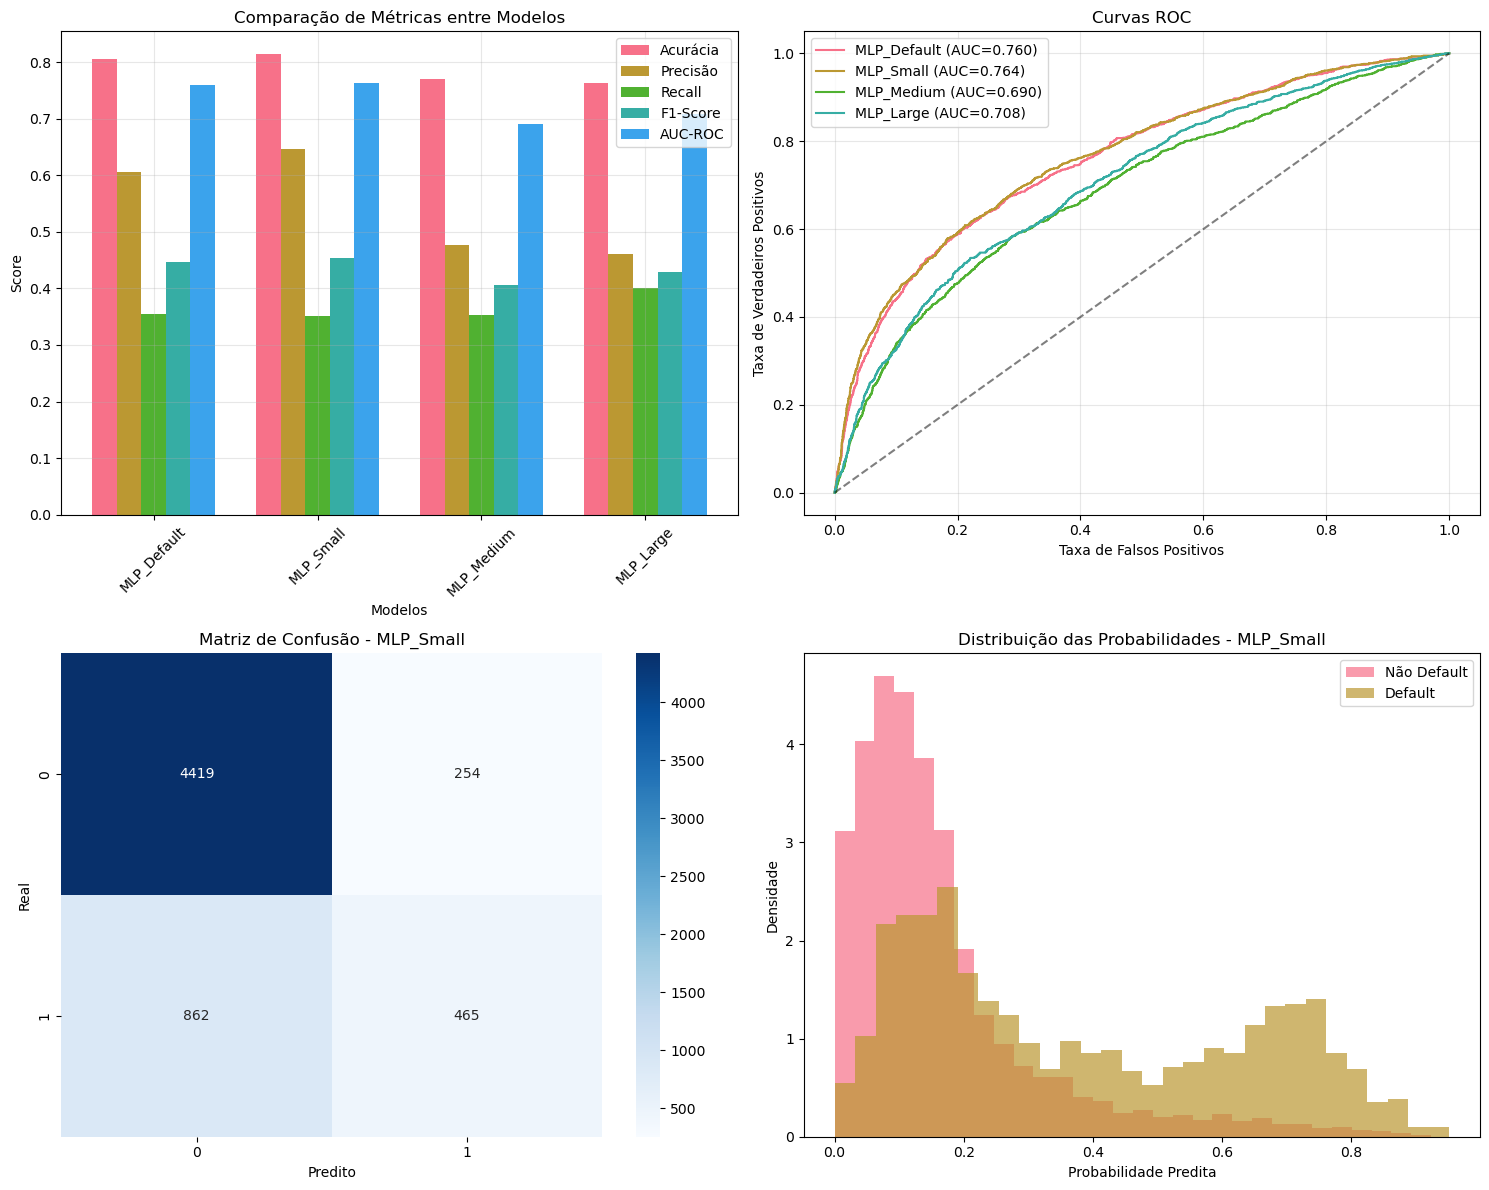

In [22]:
# Visualizações comparativas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico de barras das métricas
metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(results.keys()))
width = 0.15

for i, metric in enumerate(metrics):
    axes[0,0].bar(x + i*width, results_df[metric], width, label=metric)

axes[0,0].set_xlabel('Modelos')
axes[0,0].set_ylabel('Score')
axes[0,0].set_title('Comparação de Métricas entre Modelos')
axes[0,0].set_xticks(x + width*2)
axes[0,0].set_xticklabels(results_df['Modelo'], rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Curvas ROC
for name in results.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    axes[0,1].plot(fpr, tpr, label=f"{name} (AUC={results[name]['auc']:.3f})")

axes[0,1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0,1].set_xlabel('Taxa de Falsos Positivos')
axes[0,1].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0,1].set_title('Curvas ROC')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Matriz de confusão do melhor modelo (maior AUC)
best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
best_y_pred = results[best_model_name]['y_pred']

cm = confusion_matrix(y_test, best_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title(f'Matriz de Confusão - {best_model_name}')
axes[1,0].set_xlabel('Predito')
axes[1,0].set_ylabel('Real')

# Distribuição das probabilidades preditas
axes[1,1].hist(results[best_model_name]['y_pred_proba'][y_test==0],
              bins=30, alpha=0.7, label='Não Default', density=True)
axes[1,1].hist(results[best_model_name]['y_pred_proba'][y_test==1],
              bins=30, alpha=0.7, label='Default', density=True)
axes[1,1].set_xlabel('Probabilidade Predita')
axes[1,1].set_ylabel('Densidade')
axes[1,1].set_title(f'Distribuição das Probabilidades - {best_model_name}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

## **6. ANÁLISE DETALHADA DO MELHOR MODELO**

In [23]:
print(f"\n6. ANÁLISE DETALHADA DO MELHOR MODELO")
print("-" * 40)

print(f"Melhor modelo: {best_model_name}")
print(f"Configuração: {results[best_model_name]['model']}")


6. ANÁLISE DETALHADA DO MELHOR MODELO
----------------------------------------
Melhor modelo: MLP_Small
Configuração: MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)


In [24]:
# Relatório de classificação detalhado
print(f"\nRelatório de Classificação Detalhado:")
print(classification_report(y_test, best_y_pred,
                          target_names=['Não Default', 'Default']))


Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

 Não Default       0.84      0.95      0.89      4673
     Default       0.65      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [25]:
# Informações sobre o treinamento
best_model = results[best_model_name]['model']
print(f"\nInformações do treinamento:")
print(f"  Número de iterações: {best_model.n_iter_}")
print(f"  Camadas ocultas: {best_model.hidden_layer_sizes}")
print(f"  Função de ativação: {best_model.activation}")
print(f"  Solver: {best_model.solver}")
print(f"  Taxa de aprendizado: {best_model.learning_rate_init}")


Informações do treinamento:
  Número de iterações: 170
  Camadas ocultas: (50,)
  Função de ativação: relu
  Solver: adam
  Taxa de aprendizado: 0.001


In [26]:
# Obter os valores reais do conjunto de teste (é uma Series, converte para DataFrame)
y_test_df = y_test.reset_index(drop=True)
y_test_df.name = 'Valor Real'

# Obter as previsões do melhor modelo
best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
best_y_pred = results[best_model_name]['y_pred']
best_y_pred_proba = results[best_model_name]['y_pred_proba']

# Criar um DataFrame com os resultados
previsao_df = pd.DataFrame({
    'Valor Real': y_test_df,
    'Valor Previsto': best_y_pred,
    'Probabilidade Prevista (Classe 1)': best_y_pred_proba
})

print("\nPrevisão Prática no Conjunto de Teste:")
print("-" * 40)
print(previsao_df.head(30))


Previsão Prática no Conjunto de Teste:
----------------------------------------
    Valor Real  Valor Previsto  Probabilidade Prevista (Classe 1)
0            0               0                           0.063144
1            0               0                           0.111515
2            0               0                           0.140732
3            1               0                           0.130322
4            0               0                           0.025049
5            0               0                           0.002280
6            0               0                           0.219797
7            0               0                           0.017541
8            0               0                           0.065691
9            0               0                           0.075345
10           0               0                           0.140425
11           0               0                           0.174250
12           1               0                           0.18

Podemos ver que o modelo tem dificuldade em prever corretamente a classe 1 (default), ou seja, quando o valor real é 1.

Com base no relatório de classificação detalhado do melhor modelo, a explicação para o modelo errar tanto quando o valor real é "Default" (classe 1) é clara:

Baixo Recall para a Classe 1 (Default): O Recall para a classe "Default" é de 0.35. Isso significa que o modelo conseguiu identificar corretamente apenas 35% dos clientes que REALMENTE deram default. Os outros 65% dos clientes que deram default foram classificados incorretamente como "Não Default" (Falsos Negativos).

Impacto do Desbalanceamento: A classe "Default" é a classe minoritária no seu conjunto de dados (1327 instâncias contra 4673 de "Não Default"). O modelo, ao aprender com um conjunto onde a maioria esmagadora são instâncias "Não Default", tende a priorizar a classificação correta da classe majoritária para maximizar a acurácia geral. [1, 2] Como há muito menos exemplos da classe "Default" para aprender, o modelo tem dificuldade em reconhecer os padrões que caracterizam essa classe.

Baixa Precisão para a Classe 1 (Default): A Precisão para a classe "Default" é de 0.65. Isso indica que, das vezes em que o modelo PREVIU que um cliente daria default, ele acertou em 65% dos casos. Os outros 35% das previsões de "Default" estavam incorretas (Falsos Positivos). Embora 65% possa parecer razoável isoladamente, em conjunto com o baixo Recall, demonstra que o modelo não está prevendo a classe 1 com alta confiança e está cometendo erros de classificação em ambos os sentidos (classificando "Default" como "Não Default" e vice-versa, mas com maior frequência no primeiro caso devido ao baixo Recall).

Baixo F1-Score para a Classe 1 (Default): O F1-Score (0.45) é uma métrica que considera tanto a Precisão quanto o Recall. Um F1-Score baixo para a classe 1 reforça a dificuldade do modelo em lidar com essa classe, pois tanto a Precisão quanto o Recall são impactados negativamente.

Em essência, o desbalanceamento de classes leva o modelo a ser muito bom em identificar a classe "Não Default" (Recall de 0.95), mas sacrifíca a performance na identificação da classe "Default" (Recall de 0.35). Isso resulta em um grande número de Falsos Negativos (clientes que dão default, mas o modelo prevê que não darão), que é o principal motivo do modelo "errar tanto" quando o valor real é "Default".